# Data Visualization Code-Along - Using Matplotlib and Seaborn

### Imports and Data

In [1]:
# Data manipulation
import pandas as pd

# Math
import numpy as np
# Set seed for reproducability
np.random.seed(2019)

# Data visualization - helps customize plots
import matplotlib.pyplot as plt
# Setting our matplotlib settings
%matplotlib inline 

# Prettier data visualization
import seaborn as sns
# Setting a default style for our seaborn plots
sns.set(style = 'darkgrid')

In [2]:
# Before reading in a csv file, we can check what's in our current directory
!ls

barplot-vs-histogram.png
Clean-Austin_Animal_Center_Intakes.csv
Code-Along_Matplotlib-and-Seaborn.ipynb
README.md


In [3]:
# Reading in our csv
df = pd.read_csv("Clean-Austin_Animal_Center_Intakes.csv")

In [4]:
# Examining our csv
df.head()

,animal_id,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Age upon Intake,year,month_intake,day_intake,...,Date of Birth,Outcome Type,Animal Type_outcome,Sex upon Outcome,Age upon Outcome,Breed,Color,month_outcome,day_outcome,days_in_shelter
0,A792908,2019-04-16,10505 S Ih 35 in Austin (TX),Public Assist,Normal,Other,1 year,2019,4,16,...,04/16/2018,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,4.0,17.0,1
1,A488234,2019-04-16,Clear Veiw in Travis (TX),Public Assist,Normal,Dog,13 years,2019,4,16,...,10/02/2005,Return to Owner,Dog,Neutered Male,13 years,German Shepherd/Labrador Retriever,Brown/Black,4.0,24.0,8
2,A792904,2019-04-16,9808 Crownridge in Austin (TX),Stray,Normal,Dog,4 months,2019,4,16,...,11/16/2018,Transfer,Dog,Neutered Male,5 months,Pointer Mix,Black/White,4.0,24.0,8
3,A792902,2019-04-16,2412 Bitter Creek in Austin (TX),Stray,Normal,Cat,1 week,2019,4,16,...,04/09/2019,Transfer,Cat,Unknown,1 weeks,Domestic Shorthair Mix,Buff,4.0,18.0,2
4,A792899,2019-04-16,2412 Bitter Creek in Austin (TX),Stray,Normal,Cat,1 week,2019,4,16,...,04/09/2019,Transfer,Cat,Unknown,1 weeks,Domestic Shorthair Mix,Orange Tabby,4.0,18.0,2


In [5]:
# More ways of examining our csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86764 entries, 0 to 86763
Data columns (total 22 columns):
animal_id              86764 non-null object
DateTime_intake        86764 non-null object
Found Location         86764 non-null object
Intake Type            86764 non-null object
Intake Condition       86764 non-null object
Animal Type_intake     86764 non-null object
Age upon Intake        86764 non-null object
year                   86764 non-null int64
month_intake           86764 non-null int64
day_intake             86764 non-null int64
Name                   65599 non-null object
DateTime_outcome       86764 non-null object
Date of Birth          86764 non-null object
Outcome Type           86761 non-null object
Animal Type_outcome    86764 non-null object
Sex upon Outcome       86762 non-null object
Age upon Outcome       86763 non-null object
Breed                  86764 non-null object
Color                  86764 non-null object
month_outcome          86764 non-null f

In [6]:
# Still more ways to examine our csv
df.describe()

,year,month_intake,day_intake,month_outcome,day_outcome,days_in_shelter
count,86764.000000,86764.000000,86764.000000,86764.000000,86764.000000,86764.000000
mean,2016.029817,6.257180,15.389459,6.935872,16.077279,21.336303
std,1.615893,3.291534,8.735011,3.307431,8.723639,36.933167
min,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2015.000000,3.000000,8.000000,4.000000,9.000000,4.000000
50%,2016.000000,6.000000,15.000000,7.000000,16.000000,7.000000
75%,2017.000000,9.000000,23.000000,10.000000,24.000000,22.000000
max,2019.000000,12.000000,31.000000,12.000000,31.000000,356.000000


### [Barplots:](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

Barplots are used for displaying one dimensional, discrete data. 

"One axis of a bar graph features the categories being compared, while the other axis represents the value of each. The length of each bar is proportionate to the value it represents." [(source)](https://visme.co/blog/types-of-graphs/#i7IKQBydAHvVADcl.99)

Call plt.bar with at least two arguments:

- x: a list of categories
- height: a value for each category

#### Task 1:
Create a bar chart showing the number of days in shelter for five named dogs.

In [7]:
# Step one: grab all dogs
df_dog = df.loc[df['Animal Type_intake'] == 'Dog']

In [8]:
# Step two: grab all named dogs
named_dogs = df_dog.loc[df_dog['Name'].isnull() != True]

In [9]:
# Step three: grab five
first_five_named_dogs = named_dogs.head()
first_five_named_dogs

,animal_id,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Age upon Intake,year,month_intake,day_intake,...,Date of Birth,Outcome Type,Animal Type_outcome,Sex upon Outcome,Age upon Outcome,Breed,Color,month_outcome,day_outcome,days_in_shelter
1,A488234,2019-04-16,Clear Veiw in Travis (TX),Public Assist,Normal,Dog,13 years,2019,4,16,...,10/02/2005,Return to Owner,Dog,Neutered Male,13 years,German Shepherd/Labrador Retriever,Brown/Black,4.0,24.0,8
2,A792904,2019-04-16,9808 Crownridge in Austin (TX),Stray,Normal,Dog,4 months,2019,4,16,...,11/16/2018,Transfer,Dog,Neutered Male,5 months,Pointer Mix,Black/White,4.0,24.0,8
12,A790139,2019-04-16,Austin (TX),Owner Surrender,Normal,Dog,2 months,2019,4,16,...,02/13/2019,Adoption,Dog,Neutered Male,2 months,German Shepherd/Great Pyrenees,Black,4.0,17.0,1
13,A765990,2019-04-16,Austin (TX),Owner Surrender,Normal,Dog,1 year,2019,4,16,...,10/31/2017,Adoption,Dog,Neutered Male,1 year,Labrador Retriever/Australian Kelpie,Red,6.0,21.0,66
16,A792894,2019-04-16,Austin (TX),Stray,Normal,Dog,2 years,2019,4,16,...,04/16/2017,Return to Owner,Dog,Intact Male,2 years,Chihuahua Shorthair,Red,4.0,17.0,1


In [10]:
# Set your x and y axes/variables
x = first_five_named_dogs['Name']
y = first_five_named_dogs['days_in_shelter']

<BarContainer object of 5 artists>

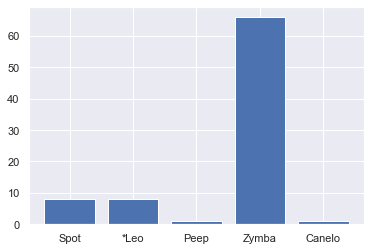

In [11]:
# Make a bar plot!
plt.bar(x,y)

<BarContainer object of 5 artists>

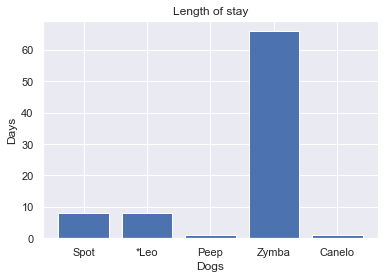

In [14]:
# Okay, now improve/prettify your bar plot. Titles, labels, etc.
plt.title('Length of stay')
plt.xlabel('Dogs')
plt.ylabel('Days')
plt.bar(x,y)

So what? What does this show you? What kind of information can you glean from a bar graph?

### [Histograms:](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)

Histograms are like barplots in the sense that they describe one-dimensional data. However, a histogram divides the data into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing continuous variables. 

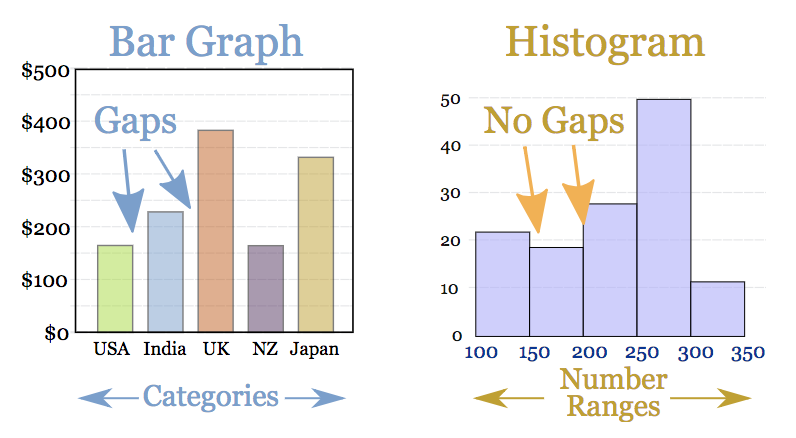

Call plt.hist with at least one argument:

- x: the input/variable to be counted

#### Task 2: 
Create a histogram showing how many days that dogs spend in shelter.

In [20]:
# Make sure you have your dog data, or grab that now
hist_dog_data = df_dog.head(100)

In [21]:
# Define your input variable
for_hist = hist_dog_data["days_in_shelter"]

(array([46., 15., 14.,  0.,  3.,  3.,  3.,  1.,  0.,  1.,  1.,  2.,  0.,
         1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  2.,  3.]),
 array([  1.        ,   5.36666667,   9.73333333,  14.1       ,
         18.46666667,  22.83333333,  27.2       ,  31.56666667,
         35.93333333,  40.3       ,  44.66666667,  49.03333333,
         53.4       ,  57.76666667,  62.13333333,  66.5       ,
         70.86666667,  75.23333333,  79.6       ,  83.96666667,
         88.33333333,  92.7       ,  97.06666667, 101.43333333,
        105.8       , 110.16666667, 114.53333333, 118.9       ,
        123.26666667, 127.63333333, 132.        ]),
 <a list of 30 Patch objects>)

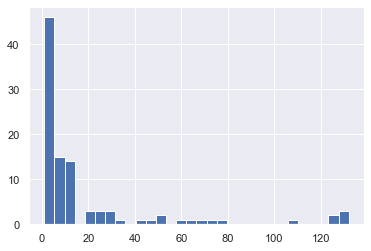

In [24]:
# Let's go ahead and throw that into a histogram!
plt.hist(for_hist, bins = 30)

In [ ]:
# Interpret that histogram by adding a title and x/y labels
# Change around the number of bins, too - how does that change perspective?


Again, so what? What does this tell you?

Compare to a normal random distribution (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)

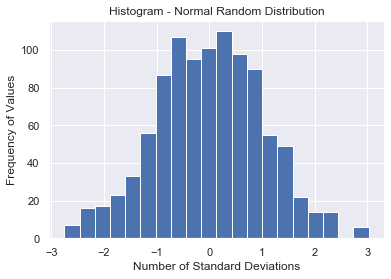

In [27]:
# Generate 1000 values
x = np.random.randn(1000)

# Plot the histogram
plt.hist(x, bins=20)

# Labels
plt.xlabel('Number of Standard Deviations')
plt.ylabel('Frequency of Values')
plt.title('Histogram - Normal Random Distribution')

plt.show()

### [Scatterplot:](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

Scatterplots visualize two dimensional data (observations with two variables). It allows us to examine the relationship between two variables.

Call plt.scatter with at least two arguments:

- x: first variable
- y: second variable

#### Task 3:
Create a scatter plot to compare the age of a dog, in days, to the number of days spent in shelter.

In [28]:
# Need to do some data wrangling to get there! Look at "Age upon Outcome", why
# is that harder to use than calculating an age in days?
df_dog["DateTime_outcome"].head()

1     2019-04-24
2     2019-04-24
10    2019-04-26
11    2019-04-21
12    2019-04-17
Name: DateTime_outcome, dtype: object

In [32]:
# Convert the outcome date to datetime
# Converting to datetime will likely result in a setting with copy warning
# I hate those. Check out this link for when/why you should care about them,
# though: https://www.dataquest.io/blog/settingwithcopywarning/
df_dog["DateTime_outcome"] = pd.to_datetime(df_dog["DateTime_outcome"],
                                            format="%Y-%m-%d")

C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# Convert date of birth to datetime
df_dog["Date of Birth"] = pd.to_datetime(df_dog["Date of Birth"])

C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# Get age in days
df_dog["Age"] = (df_dog["DateTime_outcome"] - df_dog["Date of Birth"]).dt.days

C:\Users\anupj\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


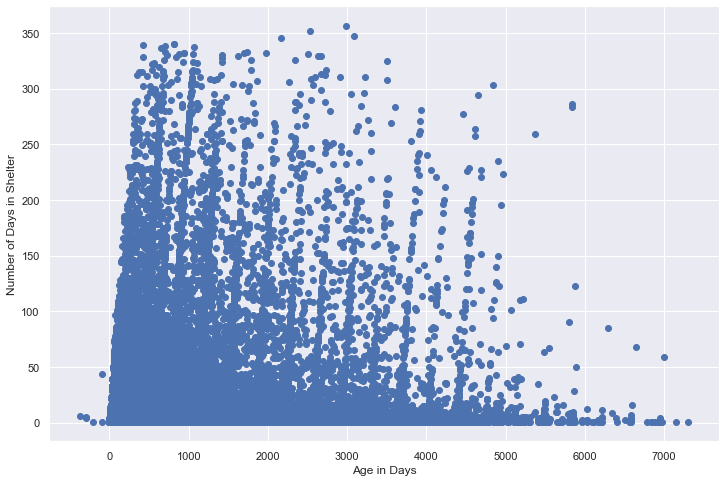

In [35]:
# Plot your scatterplot! Anything wrong with this? See anything weird?
plt.figure(figsize=(12,8))
plt.scatter(df_dog["Age"], df_dog["days_in_shelter"])
plt.xlabel("Age in Days")
plt.ylabel("Number of Days in Shelter")
plt.show()

Why was it useful to do a scatterplot in this instance? What other uses can you think of for using a scatterplot?

### And now, [Seaborn:](https://seaborn.pydata.org/)

#### Task 4:
Create a pairplot to examine our variables.

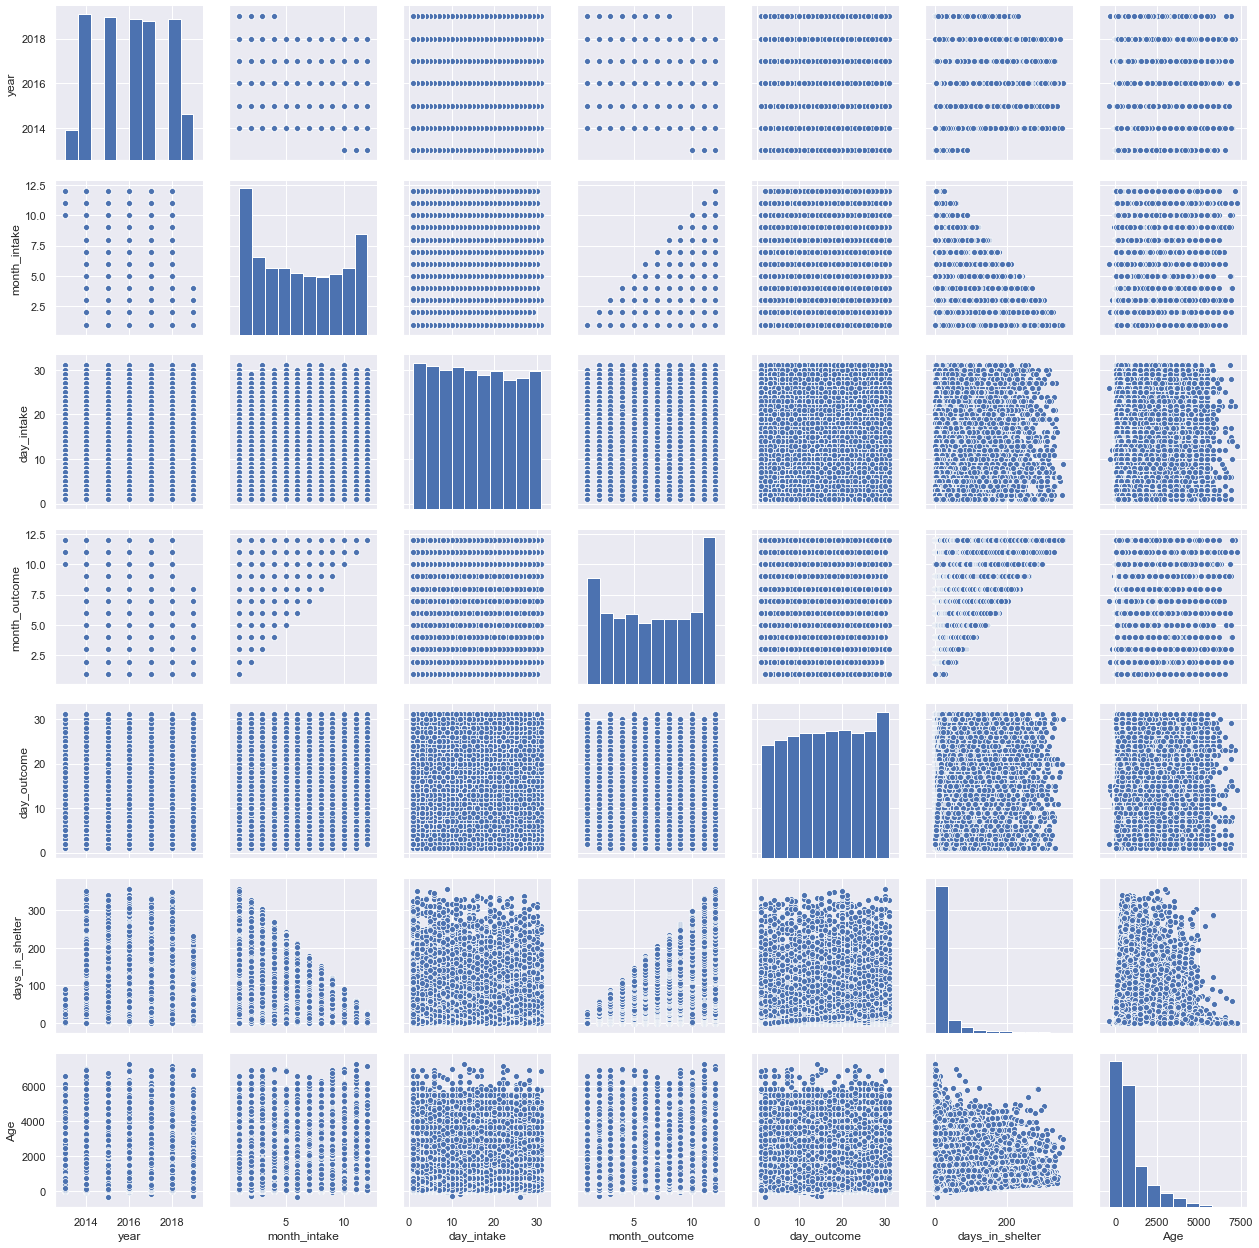

In [37]:
# Apply a basic pairplot
sns.pairplot(df_dog)

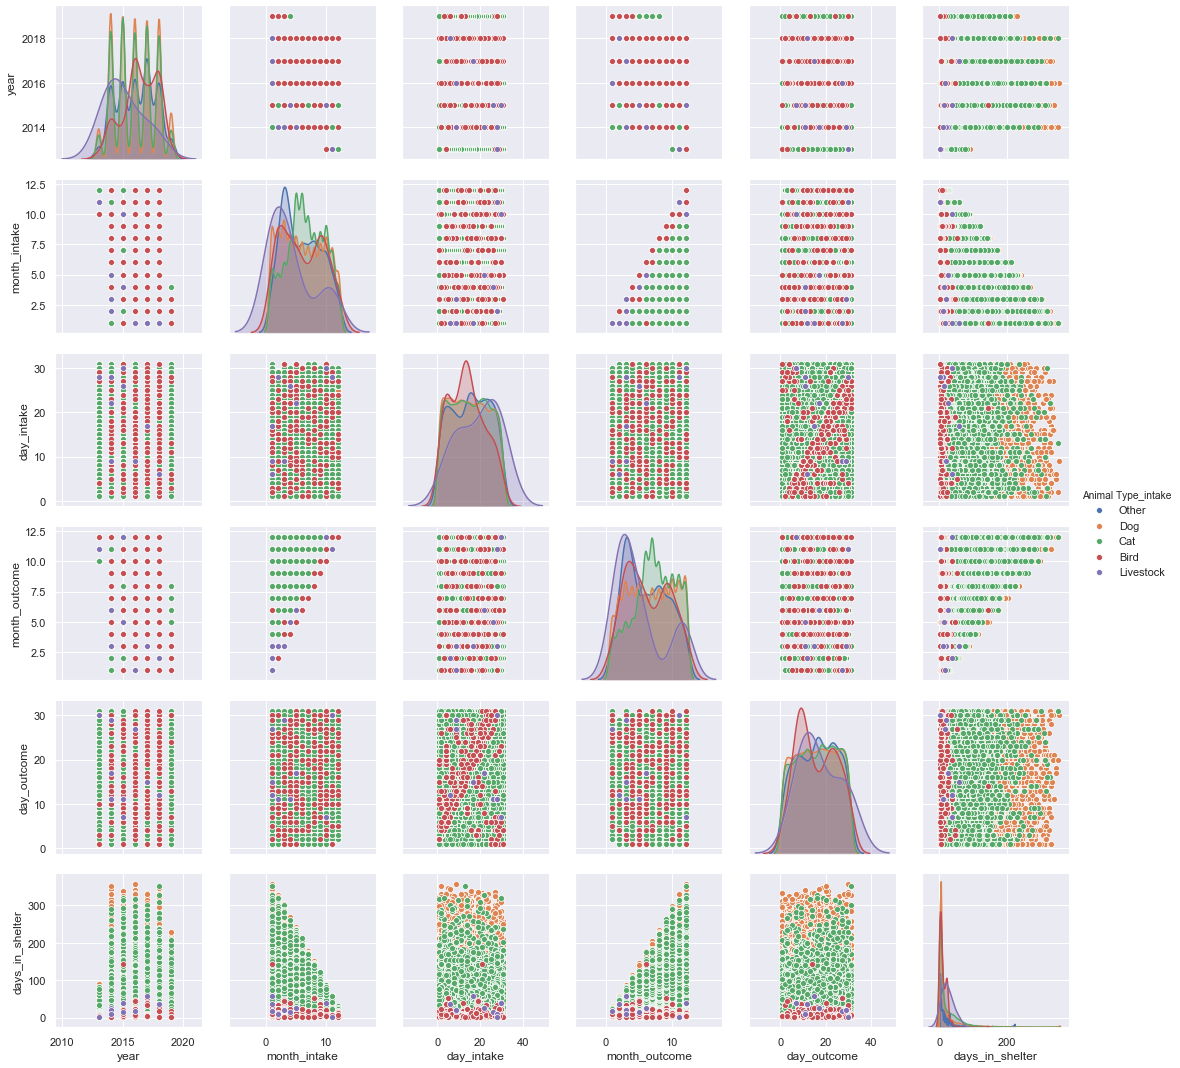

In [38]:
# Now use the hue argument
sns.pairplot(df, hue="Animal Type_intake")

What is a pairplot doing? Why is it useful, and when would it not be useful? What isn't in this plot?

### Sources!

Types of plots: some comparisons and descriptions from [visme.co](https://visme.co/blog/types-of-graphs/)

### Further reading 

- When to use pairplots, and how to make them more useful: [Towards Data Science](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
- The ultimate Seaborn tutorial (cannot recommend this enough): [Elite Data Science](https://elitedatascience.com/python-seaborn-tutorial)
- Understanding the SettingWithCopyWarning: [Dataquest](https://www.dataquest.io/blog/settingwithcopywarning/)